In [1]:
import re

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# To fill the missing values
from sklearn.impute import KNNImputer

In [2]:
sns.set(font_scale = 1.5)

pd.options.display.max_columns= 200
pd.options.display.max_rows= 1000
pd.options.display.max_columns= 200

In [3]:
df = pd.read_excel(r"C:\Users\User\Desktop\House-Price-Prediction\input\Real_Estate Data.xlsx")

In [4]:
df.head()

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,1,"Pune, Maharashtra, India",Bavdhan,1 BHK,492,39,3.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,2,"Pune, Maharashtra, India",Bavdhan,2 BHK,774,65,6.5,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,3,"Pune, Maharashtra, India",Bavdhan,3 BHK,889,74,7.4,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,4,"Pune, Maharashtra, India",Bavdhan,3 BHK Grand,1018,89,8.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,5,"Pune, Maharashtra, India",Mahalunge,2BHK,743,74,7.4,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes


# Data Preprocessing/Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sr. No.                           200 non-null    int64  
 1   Location                          200 non-null    object 
 2   Sub-Area                          200 non-null    object 
 3   Propert Type                      200 non-null    object 
 4   Property Area in Sq. Ft.          200 non-null    object 
 5   Price in lakhs                    200 non-null    object 
 6   Price in Millions                 199 non-null    float64
 7   Company Name                      200 non-null    object 
 8   TownShip Name/ Society Name       200 non-null    object 
 9   Total TownShip Area in Acres      51 non-null     float64
 10  ClubHouse                         200 non-null    object 
 11  School / University in Township   200 non-null    object 
 12  Hospital

In [6]:
df.rename(columns={"Propert Type":"Property Type"}, inplace = True)

In [7]:
df["Property Type"].unique()

array(['1 BHK', '2 BHK', '3 BHK', '3 BHK Grand', '2BHK', '3BHK', '4BHK',
       '5BHK', '6BHK', '1BHK', 'shop', '2 bhk', '2bhk ', '3  bhk ',
       '3 bhk', '2bhk', '2.5 BHK', '3 BHK ', '4 bhk', '1 bhk', '2.5 bhk',
       '1bhk', '3bhk', '3.5bhk', '3.5 bhk', '3bhk ', '2+2 bhk', '3+2bhk ',
       '2 bhk ', '5 bhk', '1bhk ', '4.5bhk', '4bhk'], dtype=object)

In [8]:
df["Property Area in Sq. Ft."].unique()

array([492, 774, 889, 1018, 743, 975, '877 to 912', '1077 to 1272', 905,
       1125, 1644, 2220, '662 to 845', '890 to 1212', 423, 665,
       '792 to 965', 462, 666, 750, 1030, 446, 796, 842, 865, 902, 1154,
       872, 934, 1088, 1109, 1163, 1419, 1485, 684, 990, 882, 1103, 543,
       '801 to 1125', '1272 to 2138', 320, 473, 581, 790, 820, 989, 1003,
       1182, 1579, 163, 491, 659, 732, 809, 460, 734, 753, 675, 917, 670,
       740, 847, 936, 1032, 1698, 2267, 725, 731, 744, 923, 930, 792,
       1180, 860, 988, 1093, 456, 644, 785, 1060, 113, 664, 673, 682, 698,
       1239, 1315, 1388, 1463, 1671, 1687, 575, 751, 761, 871, 1166, 1206,
       1272, 1279, 646, 717, 436, 637, 642, 655, 668, 810, 735, 783, 805,
       1074, 1111, 535, 947, 697, 711, 980, 1400, 1772, 1662, 705, 726,
       793, 904, 1168, 1189, 479, 693, 808, 1086, 844, 873, 606, 611, 626,
       691, 835, 854, 715, '624 to 761', 968, 996, 1038, 489, 598, 616,
       692, 867, 908, 1624, 2043, 727, '561 to 902', '10

In [9]:
def splitSum( e, flag=True):
    
#     Gives the total number of bedrooms / property area
#     params:
#         e: string, either the number of rooms or property area
#         flag: bolean, True : number of bedrooms, False : property area
#     return:
#         float, number of bedrooms / Property Area
        
    try:
        e = str(e).lower()
        e = re.sub(r"[,.;@#?!&$+]+\ *", " ", e)
        e = re.sub(r"[a-z]+", " ", e)
        e = re.sub(r"\s\s", "", e)
        
        s2list = e.strip().split()
        sumList = sum(float(e) for e in s2list)
        
        # Computing the mean value for property are that look like
        # e.g '1101 to 1113'
        e_norm = sumList if flag else sumList/len(s2list)
        return e_norm
    
    except:
        return np.nan
    
    
def normaliseProps(df):
        
#         Extracts the number of rooms from "Property Type" columns and mean 
#         "Property Area in Sq. Ft."
#         Params:
#             data: Pandas dataframe, the input data
#         Returns:
#             Pandas pataframe
        
    data = df.copy()
    data["Property Type"] = data["Property Type"].apply(splitSum)
    data["Property Area in Sq. Ft."] = data["Property Area in Sq. Ft."].apply(lambda x: splitSum(x, False))
        
    return data
        

In [10]:
# Normalising the Propert Type and Property Area in Sq. Ft.
df_norm = normaliseProps(df)

In [11]:
df_norm["Property Type"].unique()

array([1., 2., 3., 4., 5., 6., 0., 7., 8., 9.])

In [12]:
df_norm["Property Area in Sq. Ft."].unique()

array([ 492. ,  774. ,  889. , 1018. ,  743. ,  975. ,  894.5, 1174.5,
        905. , 1125. , 1644. , 2220. ,  753.5, 1051. ,  423. ,  665. ,
        878.5,  462. ,  666. ,  750. , 1030. ,  446. ,  796. ,  842. ,
        865. ,  902. , 1154. ,  872. ,  934. , 1088. , 1109. , 1163. ,
       1419. , 1485. ,  684. ,  990. ,  882. , 1103. ,  543. ,  963. ,
       1705. ,  320. ,  473. ,  581. ,  790. ,  820. ,  989. , 1003. ,
       1182. , 1579. ,  163. ,  491. ,  659. ,  732. ,  809. ,  460. ,
        734. ,  753. ,  675. ,  917. ,  670. ,  740. ,  847. ,  936. ,
       1032. , 1698. , 2267. ,  725. ,  731. ,  744. ,  923. ,  930. ,
        792. , 1180. ,  860. ,  988. , 1093. ,  456. ,  644. ,  785. ,
       1060. ,  113. ,  664. ,  673. ,  682. ,  698. , 1239. , 1315. ,
       1388. , 1463. , 1671. , 1687. ,  575. ,  751. ,  761. ,  871. ,
       1166. , 1206. , 1272. , 1279. ,  646. ,  717. ,  436. ,  637. ,
        642. ,  655. ,  668. ,  810. ,  735. ,  783. ,  805. , 1074. ,
      

In [13]:
df_norm.dtypes

Sr. No.                               int64
Location                             object
Sub-Area                             object
Property Type                       float64
Property Area in Sq. Ft.            float64
Price in lakhs                       object
Price in Millions                   float64
Company Name                         object
TownShip Name/ Society Name          object
Total TownShip Area in Acres        float64
ClubHouse                            object
School / University in Township      object
Hospital in TownShip                 object
Mall in TownShip                     object
Park / Jogging track                 object
Swimming Pool                        object
Gym                                  object
dtype: object

# Cleaning the Outliers

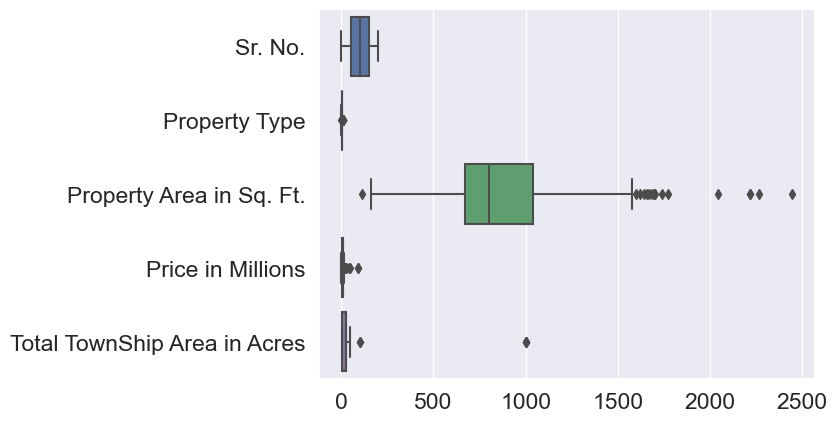

In [14]:
sns.boxplot(data = df_norm, orient= "h") 
# orient specifies the orientation of the boxplot. "h" for horizontal
plt.show()

In [15]:
def computeUpperFence( df_col, up= True):
    
#     Computer the upper/lower fence for a given column.
#     Params:
#         df_col: Pandas series, dataframe column
#         up: boolean, True for upper fence, False for lower fence
#     Return:
#         upper/lower fence value: float

    iqr = df_col.quantile(.75) - df_col.quantile(.25) #inter quartile range
    if up:
        return df_col.quantile(.75) + iqr*1.5
    return df_col.quantile(.25) - iqr*1.5

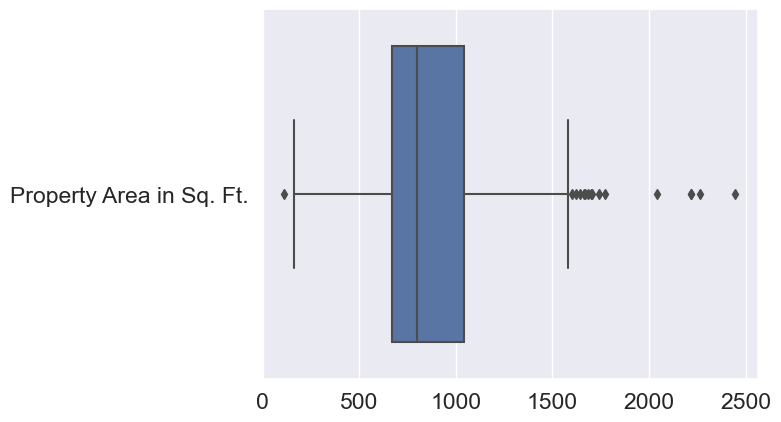

In [16]:
# Looking for outlies
sns.boxplot(data = df_norm[["Property Area in Sq. Ft."]], orient = "h")
plt.show()

In [17]:
# Checking the outliers for Property Area in Sq. Ft.

x_pa = df_norm["Property Area in Sq. Ft."]
pa_up_lim = computeUpperFence(x_pa)
df_norm[x_pa>pa_up_lim]

# They are atypical not outliers. They have many rooms.

,Sr. No.,Location,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
10,11,"Pune, Maharashtra, India",Ravet,4.0,1644.0,135,13.5,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
11,12,"Pune, Maharashtra, India",Ravet,5.0,2220.0,188,18.8,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
12,13,"Pune, Maharashtra, India",Ravet,6.0,2220.0,188,18.8,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
41,42,"Pune, Maharashtra, India",Keshav Nagar,3.0,1705.0,Null,NaN,Mantra Properties,Mantra Insignia,NaN,Yes,No,No,No,Yes,Yes,Yes
67,68,"Pune, Maharashtra, India",kayani nagar,3.0,1698.0,249,24.9,sagitarius ecospaces llp,bluegrass residences,NaN,yes,no,no,no,yes,yes,yes
68,69,"Pune, Maharashtra, India",kayani nagar,4.0,2267.0,460,46.0,sagitarius ecospaces llp,bluegrass residences,NaN,yes,no,no,no,yes,yes,yes
96,97,"Pune, Maharashtra, India",NIBM,8.0,1671.0,211,21.1,kundan Spaces,Presidia,NaN,yes,no,no,no,yes,Yes,yes
97,98,"Pune, Maharashtra, India",NIBM,8.0,1687.0,213,21.3,kundan Spaces,Presidia,NaN,yes,no,no,no,yes,Yes,yes
128,129,"Pune, Maharashtra, India",Hinjewadi,5.0,1772.0,177,17.7,Shapoorji Paloonji,Sensorium,NaN,yes,no,no,no,yes,yes,yes
131,132,"Pune, Maharashtra, India",hadapsar,5.0,1662.0,130,13.0,Wellwisher Apartments,kiarah terrazo,NaN,no,no,no,no,yes,no,no


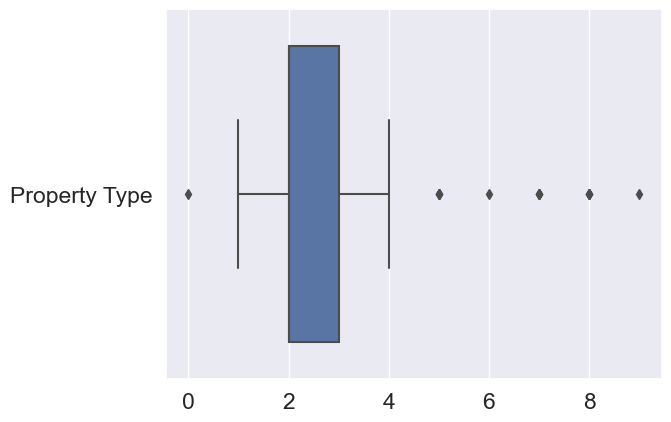

In [18]:
sns.boxplot(data = df_norm[["Property Type"]], orient = "h")
plt.show()

In [19]:
# Checking the outliers for Property Area in Sq. Ft.

x_prt = df_norm["Property Type"]
prt_up_lim = computeUpperFence(x_pa)
df_norm[x_prt>prt_up_lim]

# They are atypical not outliers. They have many rooms.

,Sr. No.,Location,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym


In [20]:
df_norm.drop(index=86, inplace = True)

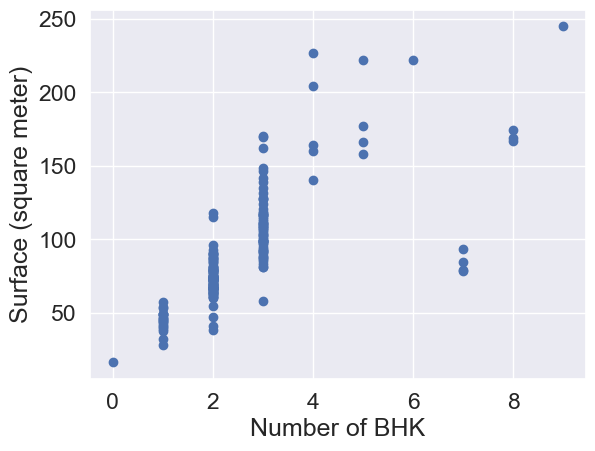

In [21]:
plt.scatter(df_norm["Property Type"],
            df_norm["Property Area in Sq. Ft."]*.1)
plt.xlabel("Number of BHK")
plt.ylabel("Surface (square meter)")
plt.show()

In [22]:
df_norm.drop(index= df_norm[df_norm["Property Type"]==7].index, inplace=True)
df_norm.shape

(195, 17)

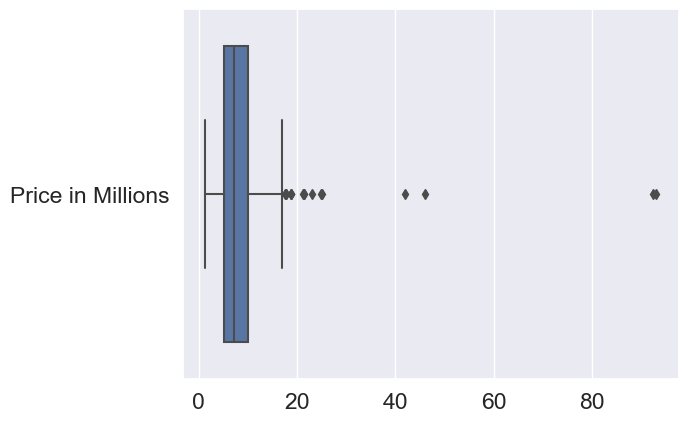

In [23]:
sns.boxplot(data = df_norm[["Price in Millions"]], orient = "h")
plt.show()

In [24]:
# Checking the outliers for Property Area in Sq. Ft.

x_pim = df_norm["Price in Millions"]
pim_up_lim = computeUpperFence(x_pa)
df_norm[x_pim>pim_up_lim]

# They are essentially large apartments except 2

,Sr. No.,Location,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym


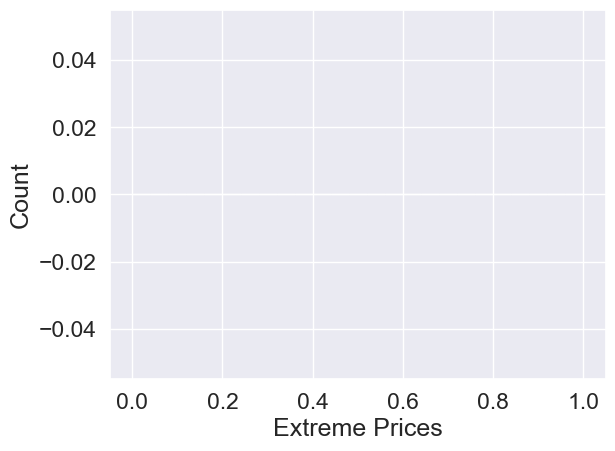

In [25]:
df_norm[ x_pim> pim_up_lim]["Price in Millions"].hist(bins=25)
plt.xlabel("Extreme Prices")
plt.ylabel("Count")
plt.show()

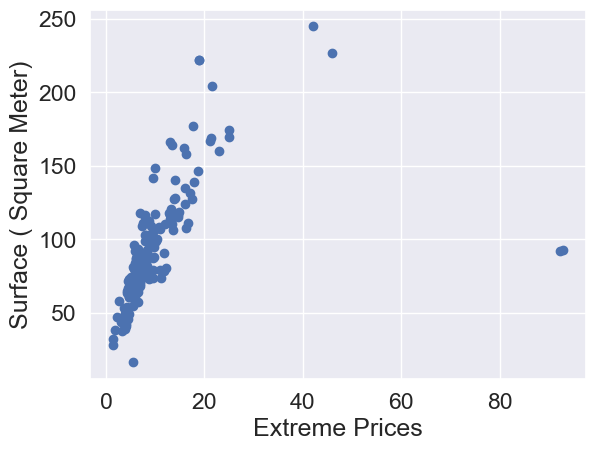

In [26]:
plt.scatter(df_norm["Price in Millions"],
            df_norm["Property Area in Sq. Ft."]*.1)
plt.xlabel("Extreme Prices")
plt.ylabel("Surface ( Square Meter)")
plt.show()

In [27]:
df_norm = df_norm[df_norm["Price in Millions"]<80]

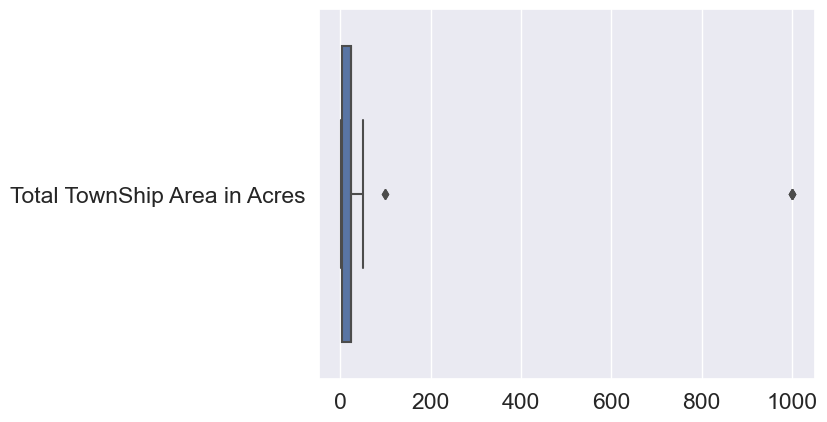

In [28]:
sns.boxplot(data = df_norm[["Total TownShip Area in Acres"]], orient="h")
plt.show()

In [29]:
# Checking the outliers for Property Area in Sq. Ft.

x_tta = df_norm["Total TownShip Area in Acres"]
tta_up_lim = computeUpperFence(x_pa)
df_norm[x_tta>tta_up_lim]

# Large cities are not outliers

,Sr. No.,Location,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym


In [30]:
tta_low_lim = computeUpperFence(x_tta)
df_norm[x_tta<tta_low_lim].head()
# These are small sub-areas

,Sr. No.,Location,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
6,7,"Pune, Maharashtra, India",Balewadi,2.0,894.5,75,7.5,ANP CORP,ANP Universe,25.0,Yes,No,No,No,Yes,Yes,Yes
7,8,"Pune, Maharashtra, India",Balewadi,3.0,1174.5,100,10.0,ANP CORP,ANP Universe,25.0,Yes,No,No,No,Yes,Yes,Yes
8,9,"Pune, Maharashtra, India",Ravet,2.0,905.0,65,6.5,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
9,10,"Pune, Maharashtra, India",Ravet,3.0,1125.0,88,8.8,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
10,11,"Pune, Maharashtra, India",Ravet,4.0,1644.0,135,13.5,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes


# Price Selection

In [31]:
# Comparing Price in Millions with Price in Lakhs
df_norm["Price in lakhs"] = df_norm["Price in lakhs"].apply(lambda x: pd.to_numeric(x, errors='coerce'))

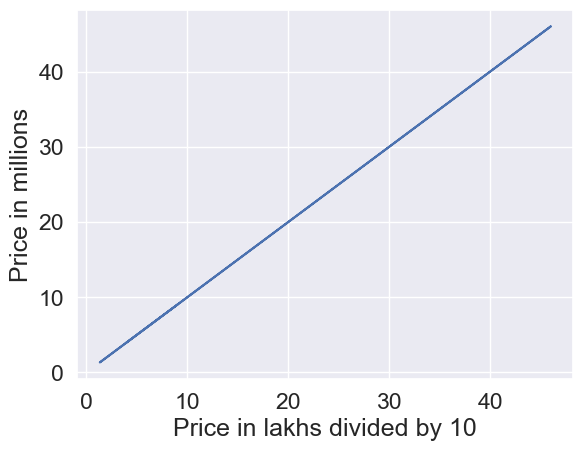

In [32]:
plt.plot(df_norm["Price in lakhs"]/10., df_norm["Price in Millions"])
plt.xlabel("Price in lakhs divided by 10")
plt.ylabel("Price in millions")
plt.show()

# NaN Values

In [33]:
def compute_fill_rate(df):
    
#     Computing the rate of non-NaNs for each column
#     Params:
#         df: Pandas dataframe, input data
#     Return:
#         Pandas data frame

    fr = pd.DataFrame(1-df.isnull().sum().values.reshape(1,-1)/df.shape[0],columns = df.columns)
    return fr

def plot_fill_rate(df):
    
#     Plot the fill rate
#     df: Pandas dataframe, input data

    fill_rate = compute_fill_rate(df)
    fig, ax = plt.subplots( figsize=(16,16))
    sns.barplot(data= fill_rate, orient = "h")
    ax.set_title("Fill rate for columns", fontsize = 28)
    
def drop_empty_axis(df, minFillRate, axis = 1):
    i = 0 if axis == 1 else 1
    return df.dropna(axis=axis, thresh=int(df.shape[i]*minFillRate))

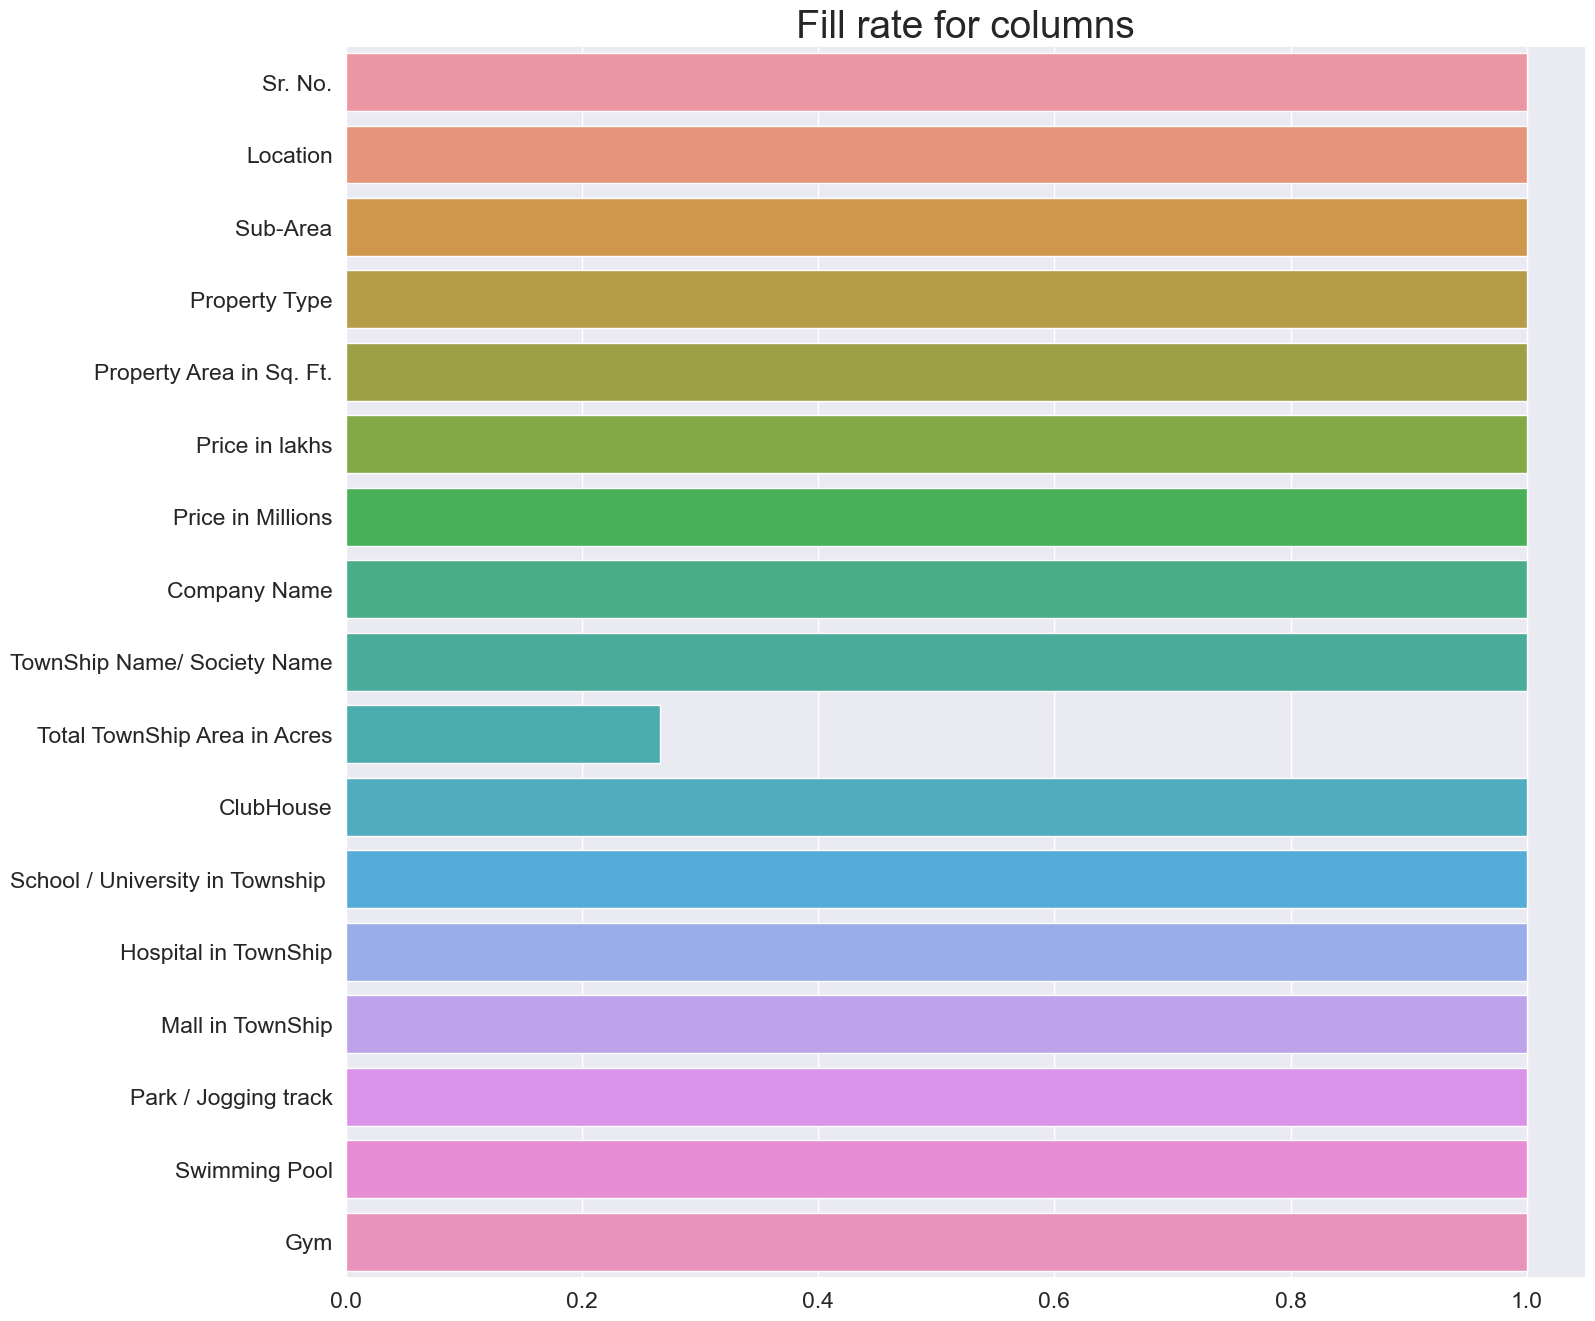

In [34]:
plot_fill_rate(df_norm)

In [35]:
compute_fill_rate(df_norm)

,Sr. No.,Location,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.265625,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [36]:
df_norm[["Sub-Area", "TownShip Name/ Society Name", "Total TownShip Area in Acres"]].sort_values("Sub-Area").reset_index(drop=True)

,Sub-Area,TownShip Name/ Society Name,Total TownShip Area in Acres
0,Akurdi,Mantra Sky Tower,3.5
1,Akurdi,Mantra Sky Tower,3.5
2,Akurdi,Mantra Sky Tower,3.5
3,Akurdi,Mantra Sky Tower,3.5
4,Akurdi,Mantra Sky Tower,3.5
5,Akurdi,Mantra Sky Tower,3.5
6,BANER,vtp solitaire,NaN
7,BANER,SUPREME ESTIA,5.0
8,BANER,SUPREME ESTIA,5.0
9,BANER,SUPREME ESTIA,5.0


In [37]:
df_norm = drop_empty_axis(df_norm, minFillRate = .5)

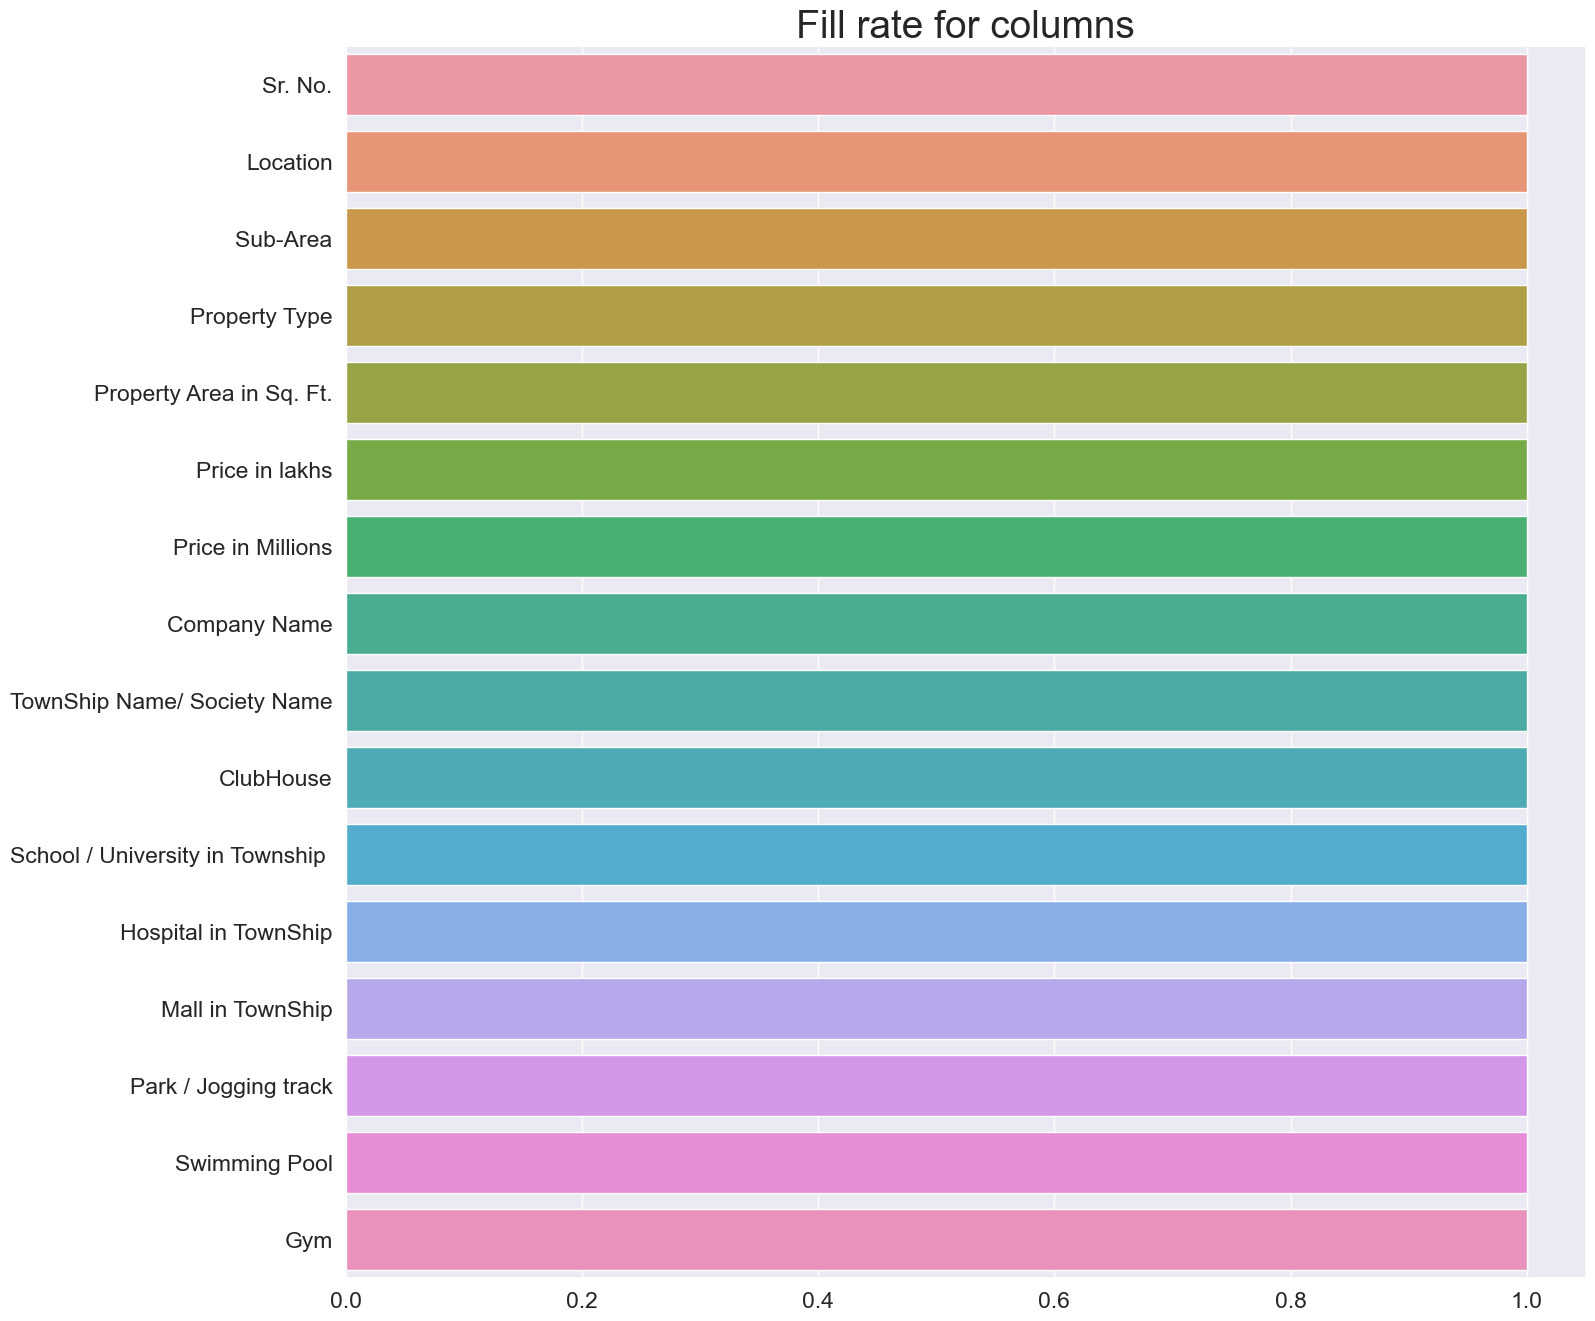

In [38]:
plot_fill_rate(df_norm)

# Regularising the categorical columns

In [39]:
# To filter columns based on their data type.
df_norm.select_dtypes(include = "object").head(3)

,Location,Sub-Area,Company Name,TownShip Name/ Society Name,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,"Pune, Maharashtra, India",Bavdhan,Shapoorji Paloonji,Vanaha,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,"Pune, Maharashtra, India",Bavdhan,Shapoorji Paloonji,Vanaha,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,"Pune, Maharashtra, India",Bavdhan,Shapoorji Paloonji,Vanaha,Yes,Yes,Yes,Yes,Yes,Yes,Yes


# Binary Categorical columns

In [40]:
binary_cols = df_norm.iloc[:,-7:].columns.to_list()
binary_cols

['ClubHouse',
 'School / University in Township ',
 'Hospital in TownShip',
 'Mall in TownShip',
 'Park / Jogging track',
 'Swimming Pool',
 'Gym']

In [41]:
def print_uniques(cols, df=df_norm):
    for col in cols:
        list_unique = df[col].unique()
        list_unique.sort()
        print(col, ":\n", list_unique)
        print("Number of unique categories:", len(list_unique))
        print("----------------")

In [42]:
print_uniques(binary_cols)

ClubHouse :
 ['Yes' 'no' 'no ' 'yes']
Number of unique categories: 4
----------------
School / University in Township  :
 ['No' 'Yes' 'no']
Number of unique categories: 3
----------------
Hospital in TownShip :
 ['No' 'Yes' 'no']
Number of unique categories: 3
----------------
Mall in TownShip :
 ['No' 'Yes' 'no' 'no ']
Number of unique categories: 4
----------------
Park / Jogging track :
 ['No' 'Yes' 'no' 'yes']
Number of unique categories: 4
----------------
Swimming Pool :
 ['No' 'Yes' 'no' 'no ' 'yes']
Number of unique categories: 5
----------------
Gym :
 ['Yes' 'no' 'no ' 'yes']
Number of unique categories: 4
----------------


In [43]:
for col in binary_cols:
    df_norm[col] = df_norm[col].apply(lambda x: x.strip().lower())
    
print_uniques(binary_cols)

ClubHouse :
 ['no' 'yes']
Number of unique categories: 2
----------------
School / University in Township  :
 ['no' 'yes']
Number of unique categories: 2
----------------
Hospital in TownShip :
 ['no' 'yes']
Number of unique categories: 2
----------------
Mall in TownShip :
 ['no' 'yes']
Number of unique categories: 2
----------------
Park / Jogging track :
 ['no' 'yes']
Number of unique categories: 2
----------------
Swimming Pool :
 ['no' 'yes']
Number of unique categories: 2
----------------
Gym :
 ['no' 'yes']
Number of unique categories: 2
----------------


# Multi-categorical columns

In [44]:
obj_cols = df_norm.select_dtypes(include="object").columns.to_list()
multiCat_cols = list(set(obj_cols)^set(binary_cols))
multiCat_cols

['Company Name', 'TownShip Name/ Society Name', 'Location', 'Sub-Area']

In [45]:
for col in multiCat_cols:
    df_norm[col] = df_norm[col].apply(lambda x: x.strip().lower())
print_uniques(multiCat_cols)

Company Name :
 ['ace constructions' 'anp corp' 'bhaktamar realities' 'calyx spaces'
 'dolphin group' 'godrej properties' 'jhala group' 'kalpataru'
 'keystone landmark' 'kohinoor group' 'kundan spaces' 'lush life'
 'maha anand pinnac associates' 'majestique landmarks' 'mantra properties'
 'nirman developers' 'oxy buildcorp' 'porwal  develkoper'
 'porwal & anand develkoper' 'proviso group' 'puraniks' 'ravima ventures'
 'sagitarius ecospaces llp' 'shapoorji paloonji' 'shroff developers'
 'sukwani associates' 'supreme' 'tejraaj group' 'unique properties'
 'urban space creator' 'vasupujya corporation'
 'venkatesh bhoomi construction' 'vijaya laxmi creations'
 'vijaya laxmi infrarealtors' 'vtp reality' 'waghvani constructions'
 'wellwisher apartments']
Number of unique categories: 37
----------------
TownShip Name/ Society Name :
 ['7hills' 'abitante fiore' 'anp universe' 'anutham' 'atulya kanhe'
 'aureta' 'bhaktamar residency' 'bliss solitaire' 'bluegrass residences'
 'brookefield willows'

In [46]:
df_norm.drop(columns=["Location"], inplace = True)

In [47]:
df_norm.drop(columns=["Price in lakhs"], inplace = True)

In [48]:
df_norm.head()

,Sr. No.,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in Millions,Company Name,TownShip Name/ Society Name,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,1,bavdhan,1.0,492.0,3.9,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
1,2,bavdhan,2.0,774.0,6.5,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
2,3,bavdhan,3.0,889.0,7.4,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
3,4,bavdhan,3.0,1018.0,8.9,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
4,5,mahalunge,2.0,743.0,7.4,godrej properties,godrej hills retreat,yes,yes,yes,yes,yes,yes,yes


In [49]:
df_norm.shape

(192, 14)

# Saving the cleaned data set

In [50]:
df_norm.columns=["index", "sub_area", "n_bhk", "surface", "price",
                "company_name", "township", "club_house", "school",
                 "hospital", "mall", "park", "pool", "gym"]

In [51]:
df_norm.to_csv("resd_clean.csv", index=False)